In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# generate two normal distributed datasets in 2D

amount = 1000
x_0 = np.ones((amount * 2,1)) # bias
x_1 = np.random.normal(8, 1, (amount, 2))
x_2 = np.random.normal(1, 1, (amount, 2))

# define the labels [-1, 1]
y_1 = np.ones((amount,1)) * -1
y_2 = np.ones((amount,1))

# add labels to the data
X_1 = np.append(x_1, y_1,1)
X_2 = np.append(x_2, y_2,1)

# combine both datasets
X = np.vstack((X_1, X_2))

# add bias to dataset
X = np.append(x_0, X, 1)

# shuffle dataset
np.random.shuffle(X)

# define y
y = X[:,3]
X = X[:,:3]

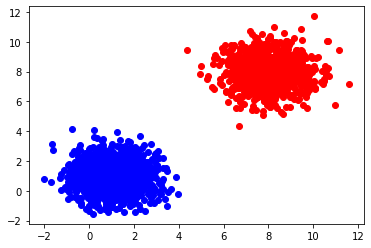

In [3]:
# plot data
plt.scatter(X_1[:,0],X_1[:,1], color='red')
plt.scatter(X_2[:,0],X_2[:,1], color='blue')
plt.show()

In [4]:
# perceptron implementation
   
def perceptron(X, y):
    rows,columns = X.shape
    weights = np.random.normal(size=columns)
    y_approx = 1.0
    
    incorrect = rows
    
    while incorrect > 0:
        incorrect = 0
        for row in range(rows):
            y_approx = weights.dot(X[row,:])
            if (y_approx * y[row] < 0):
                weights += y[row] * X[row,:]
                incorrect += 1         
    return weights

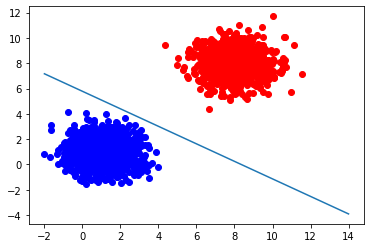

In [5]:
def f(x, w):
    return (-w[0] - w[1] * x) / w[2] 
# compute intersection from plane with z = 0 
# => w_0 + w_1 * x_1 + w_2 * x_2 = 0
# => x_2 = (-w_0 - w_1 * x_1) / w_2

w = perceptron(X, y)
x = np.arange(-2,15)

# plot data
plt.scatter(X_1[:,0],X_1[:,1], color='red')
plt.scatter(X_2[:,0],X_2[:,1], color='blue')
plt.plot(x,f(x,w) ,'-')

plt.show()
